In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [9]:
df = pd.read_pickle(r"../base_processed.pkl")

In [10]:
df = df[df.age_segment != 'Пусто' ]

In [11]:
df = df.dropna(subset=['subscription_time'])

In [12]:
df['trial_type'] = df['trial_type'].fillna(0)

In [15]:
df = df.loc[(df['trial_type'] == '1 mon')]

In [16]:
df['trial_type'].value_counts()

trial_type
1 mon    29868
Name: count, dtype: int64

In [17]:
df

,Unnamed: 0,age_category,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,...,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,sub_time_in_days,cancelled_trial
1,1,2,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,...,0,0,0,0,0,0,0,0,30.999980,1
2,2,7,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,...,0,0,0,0,0,0,0,0,1.015168,1
6,6,3,a1ed0e65df5242fcaf08713a4e90948e,2023-03-29,753966360.0,DCV,1,1,1,0,...,0,0,0,0,0,0,0,0,61.207428,0
16,16,5,6e35627b117c405b99a211ca9d587f41,2023-03-13,321565424.0,DCV,1,1,0,0,...,0,0,0,0,0,0,0,0,61.097451,0
21,21,2,fb74719b24ff4faa830a954a5e77b482,2023-03-23,755253087.0,DCV,1,1,1,0,...,0,0,0,0,0,0,0,0,70.513027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73703,73703,2,461d7cf81bd5430899cec42a6fb18741,2023-03-30,698060918.0,DCV,1,1,1,0,...,0,0,0,1,0,0,0,0,30.999983,1
73704,73704,4,9dd6813da8b64ce69d66933022e93ee0,2023-03-30,852830245.0,DCV,1,1,1,0,...,0,0,0,0,0,0,0,0,30.999984,1
73705,73705,7,c3d9072737e24388a88227d08399a4bb,2023-03-04,803521909.0,DCV,1,1,0,0,...,0,0,0,0,0,0,0,1,30.999984,1
73707,73707,6,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,...,0,0,0,0,0,0,0,0,61.012813,0


In [18]:
Q1 = df.in_total_5ms_amt.quantile(0.25)
Q3 = df.in_total_5ms_amt.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df.in_total_1ms_amt < (Q1 - 1.5 * IQR)) |(df.in_total_1ms_amt > (Q3 + 1.5 * IQR)))]

<Axes: >

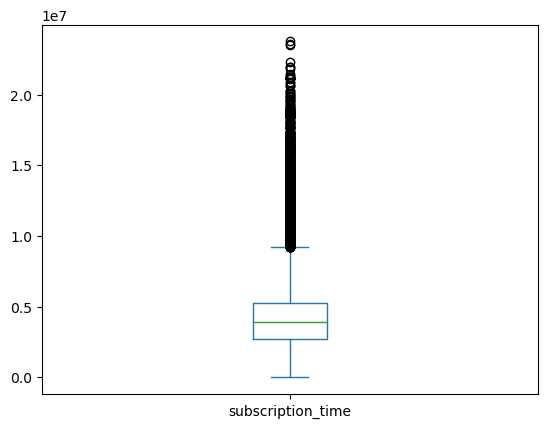

In [19]:
df.subscription_time.plot.box()

In [20]:
pl.from_pandas(df).groupby("age_category").agg(
    mean_zp = (pl.col("in_total_1ms_amt")/5).mean(),
    median_zp = (pl.col("in_total_5ms_amt")/5).median(),
    percent25 = (pl.col("in_total_5ms_amt")/5).quantile(0.25),
    percent75 = (pl.col("in_total_5ms_amt")/5).quantile(0.75)
).sort(by="age_category").to_pandas()

C:\Users\koran\AppData\Local\Temp\ipykernel_11488\2375665465.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  pl.from_pandas(df).groupby("age_category").agg(


,age_category,mean_zp,median_zp,percent25,percent75
0,1,11765.106220,5815.358,1459.196,12165.164
1,2,29379.691298,11858.652,2015.858,38679.686
2,3,51825.104160,29701.581,4307.468,81669.492
3,4,60073.147770,35068.864,5171.262,97884.440
4,5,56758.244182,33512.172,4249.844,92641.688
5,6,52117.761523,25574.857,2642.144,86426.224
6,7,45505.140370,19082.072,1478.470,75076.424
7,8,43677.427050,17772.604,1593.370,65762.692
8,9,41391.405481,13248.821,972.936,59729.360
9,10,36643.280854,11961.518,786.888,52735.596


C:\Users\koran\AppData\Local\Temp\ipykernel_11488\1683420187.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  plot = sns.barplot(data = pd.melt(pl.from_pandas(df).groupby("age_category").agg(


[Text(0, 0, '0-13'),
 Text(1, 0, '14-17'),
 Text(2, 0, '18-22'),
 Text(3, 0, '23-25'),
 Text(4, 0, '26-30'),
 Text(5, 0, '31-35'),
 Text(6, 0, '36-40'),
 Text(7, 0, '41-45'),
 Text(8, 0, '46-50'),
 Text(9, 0, '51-55'),
 Text(10, 0, '56-60'),
 Text(11, 0, '61-65'),
 Text(12, 0, '65+')]

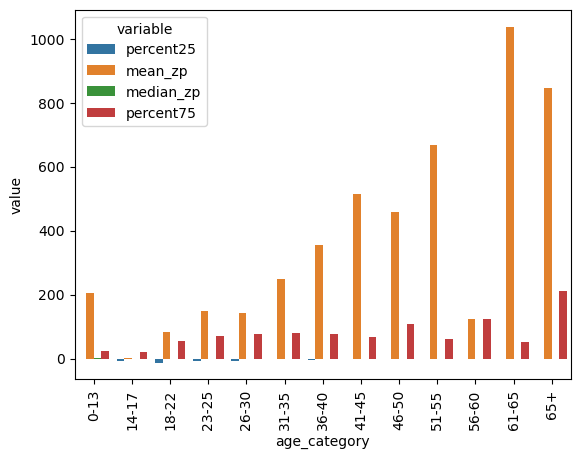

In [37]:
plot = sns.barplot(data = pd.melt(pl.from_pandas(df).groupby("age_category").agg(
    mean_zp = ((pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt"))/5).mean(),
    median_zp = ((pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt"))/5).median(),
    percent25 = ((pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt"))/5).quantile(0.25),
    percent75 = ((pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt"))/5).quantile(0.75)
).sort(by="age_category").to_pandas(),
id_vars="age_category", value_vars=["percent25","mean_zp", "median_zp", "percent75"]),

#
x = "age_category", y = "value", hue="variable")
plot.set_xticklabels(list(new_column.keys()), rotation = 90)

dict_keys(['0-13', '14-17', '18-22', '23-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '65+'])